In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [27]:
x , y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

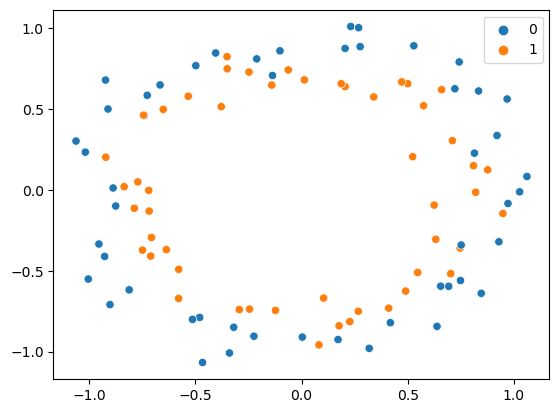

In [28]:
sns.scatterplot(x=x[:,0],y=x[:,1],hue=y)

In [29]:
X_train, X_test , y_train , y_test = train_test_split(x,y,test_size=0.20, random_state=2)

In [30]:
model = Sequential()
model.add(Dense(256, input_dim = 2 , activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/ashu/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [32]:
history = model.fit(X_train , y_train,validation_data = (X_test,y_test), epochs = 2500 , verbose=0)

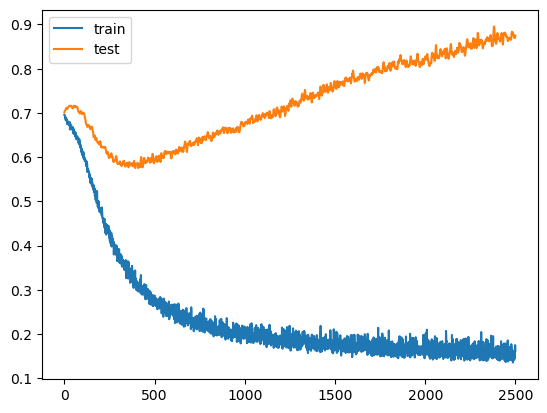

In [33]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 703us/step


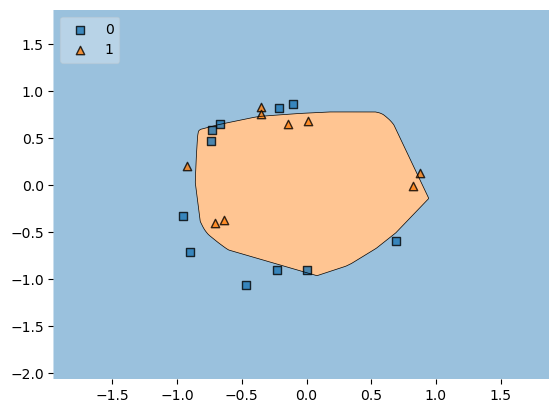

In [34]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

## EARYL STOPPING

In [36]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [37]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [42]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5320 - loss: 0.6822 - val_accuracy: 0.4000 - val_loss: 0.7208
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5688 - loss: 0.6772 - val_accuracy: 0.4000 - val_loss: 0.7219
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5922 - loss: 0.6725 - val_accuracy: 0.4000 - val_loss: 0.7228
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6000 - loss: 0.6705 - val_accuracy: 0.4000 - val_loss: 0.7234
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5820 - loss: 0.6751 - val_accuracy: 0.4000 - val_loss: 0.7236
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5469 - loss: 0.6769 - val_accuracy: 0.4000 - val_loss: 0.7231
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5570 - loss: 0.6777 - val_accuracy: 0.4000 - val_loss: 0.7222
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5398 - loss: 0.6775 - val_accuracy: 0.4000 - v

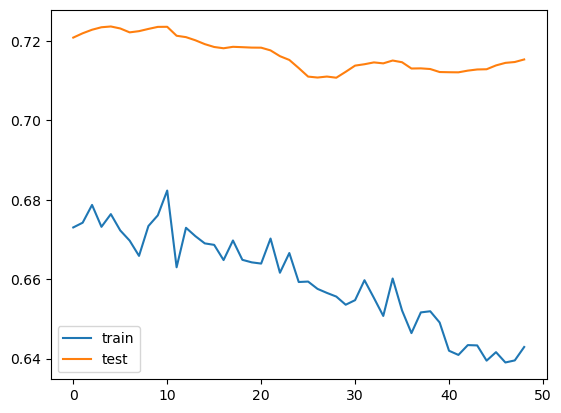

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 769us/step


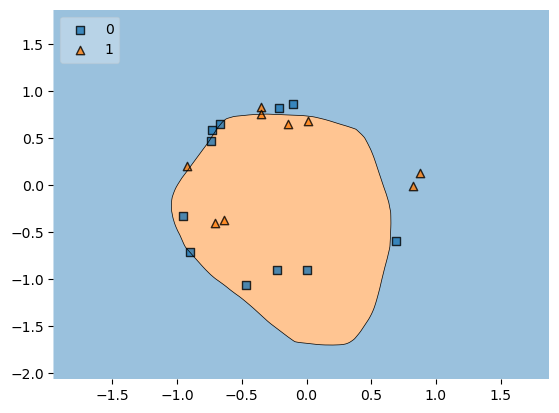

In [44]:
plot_decision_regions(X_test,y_test.ravel(),clf=model,legend=2)
plt.show()